# **Membuat Model Klasifikasi untuk Memprediksi Kualitas Anggur dengan Random Forest**

**1. Persiapan Data**

Mengimpor seluruh dataset yang dibutuhkan (data training, data testing, dan template hasil) serta menyiapkan variabel target dan fitur.

In [15]:
import pandas as pd, numpy as np, os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns




In [16]:
# Membaca file
train = pd.read_csv("data_training.csv")
test = pd.read_csv("data_testing.csv")
template_sep = pd.read_csv("hasilprediksi_3digitNIMterakhir.csv", sep=';')

# Menentukan kolom ID
id_col = 'Id' if 'Id' in template_sep.columns else template_sep.columns[0]

# Menentukan variabel target
target_col = "quality"
X = train.drop(columns=[target_col]).copy()
y = train[target_col].copy()

In [17]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


In [18]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516
...,...,...,...,...,...,...,...,...,...,...,...,...
281,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.800000,1147
282,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.900000,296
283,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.100000,170
284,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,1439


Mencari informasi dasar dari kumpulan data, seperti bentuk, tipe data, statistik umum, nilai null, dan data duplikat.

Kemudian melakukan EDA (Analisis Data Eksploratori yang merupakan proses investigasi awal untuk memahami data, mengidentifikasi pola, anomali, dan menguji hipotesis menggunakan metode visualisasi dan statistik deskriptif.

In [19]:
train.shape

(857, 13)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


In [21]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


In [22]:
train.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [23]:

train.duplicated().sum()

np.int64(0)

Melihat distribusi setiap variabel di data

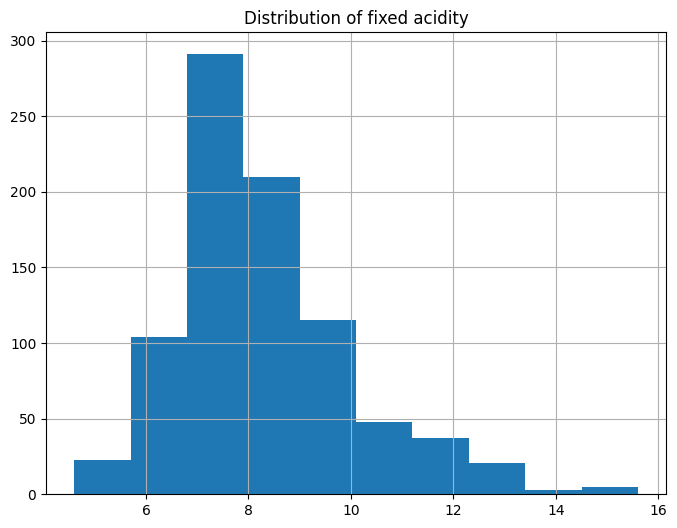

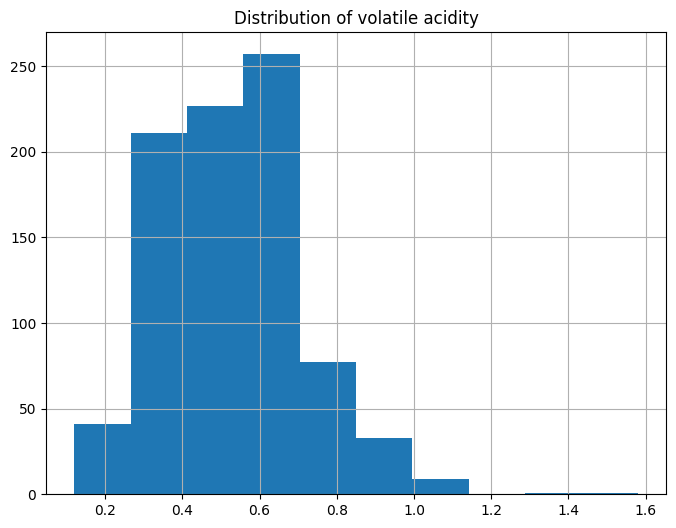

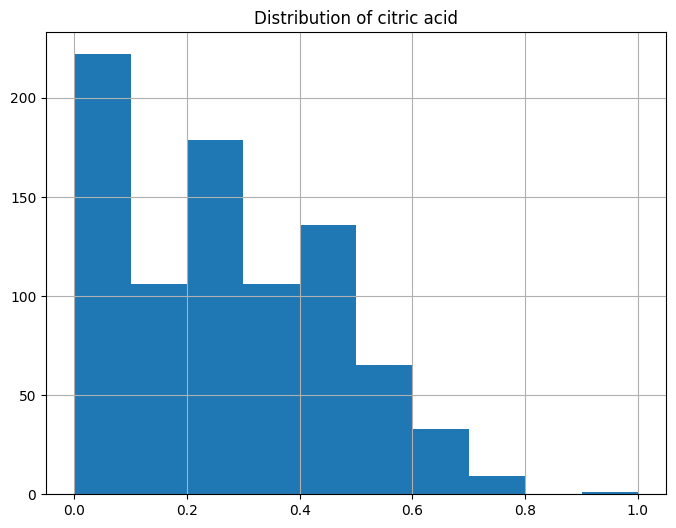

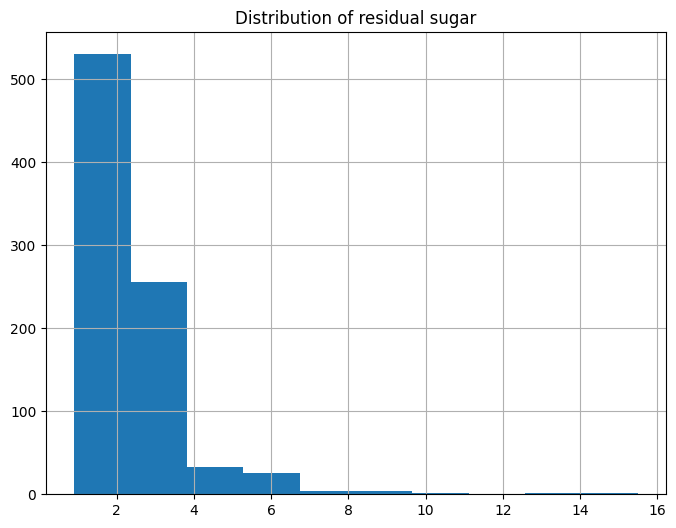

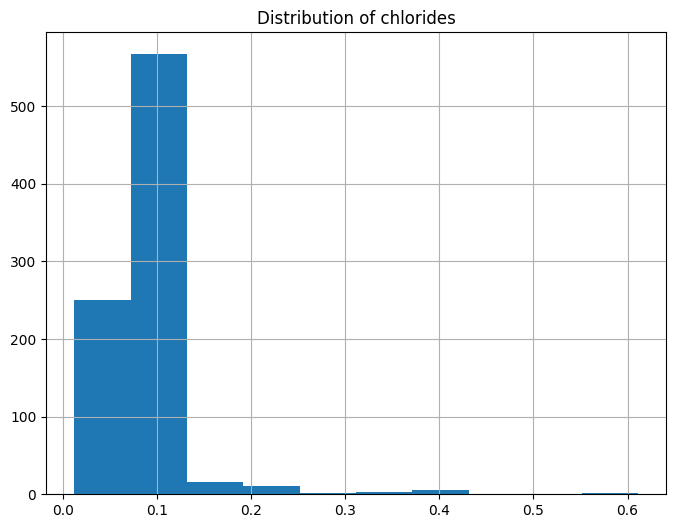

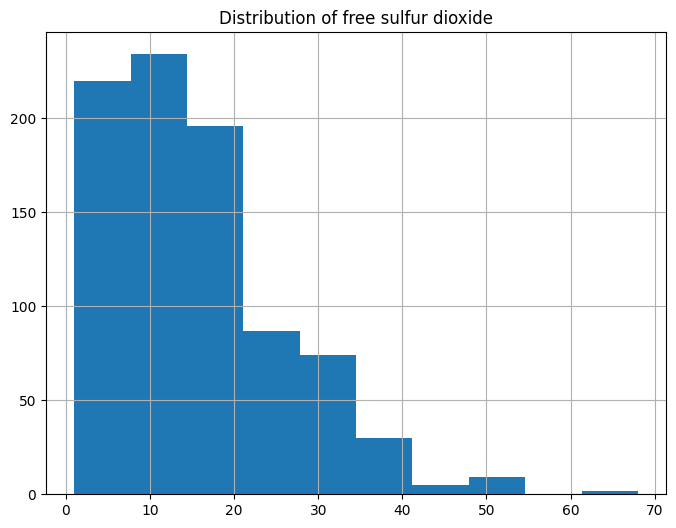

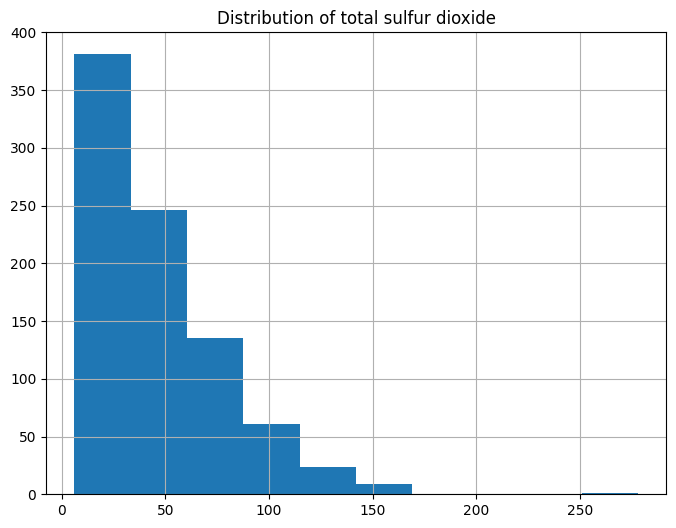

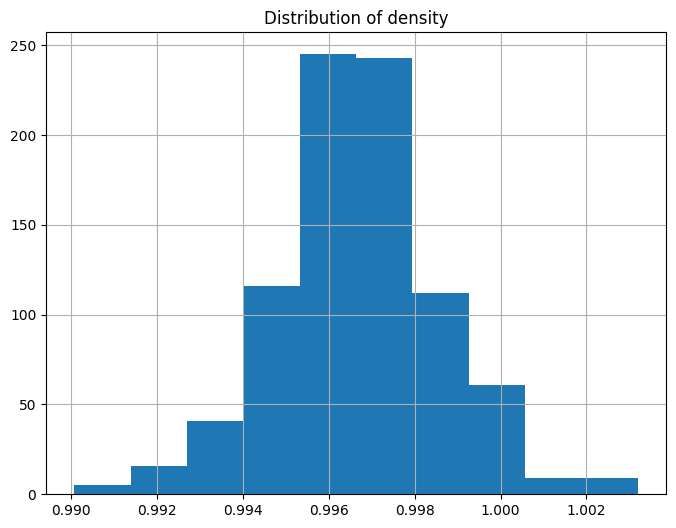

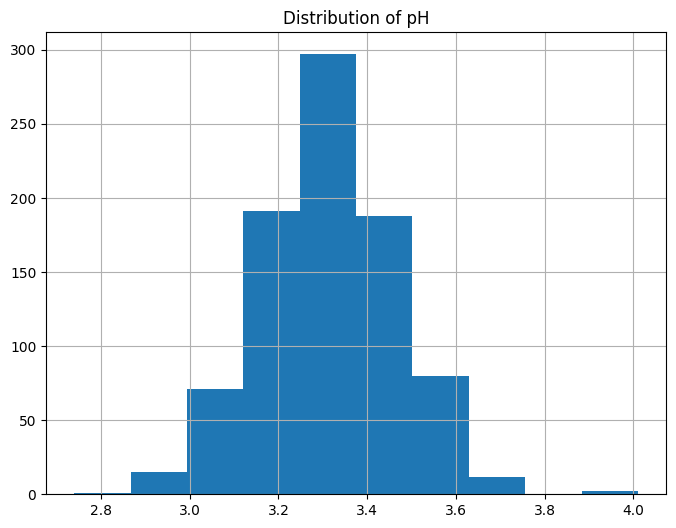

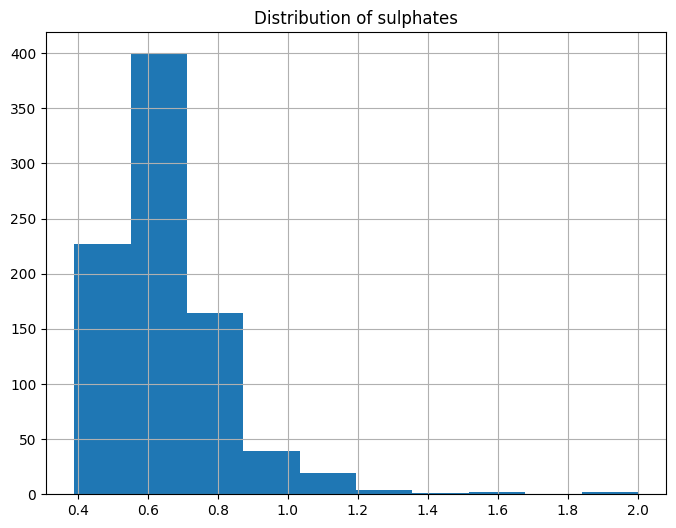

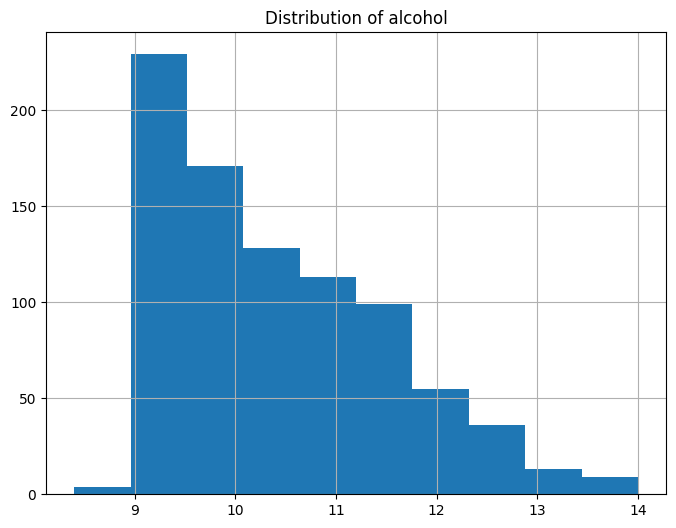

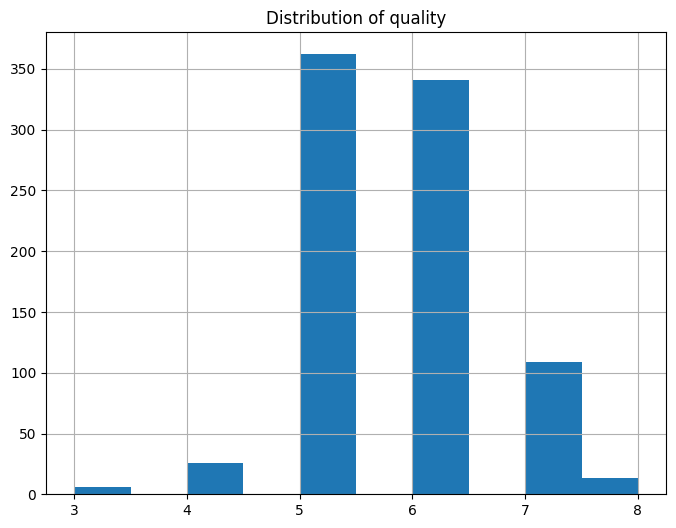

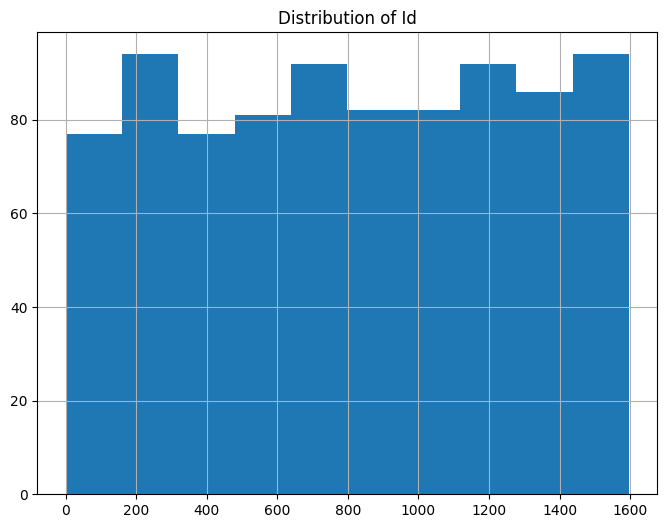

In [24]:
import os
if not os.path.exists('docs'):
    os.makedirs('docs')

for i in train.columns:
    train[i].hist(bins=10, figsize=(8,6))
    plt.title(f"Distribution of {i}")
    plt.savefig(f"docs/distribution_{i}.png")
    plt.show()

Membuat Visualisasi dengan heatmap (visualisasi data yang menampilkan nilai numerik dalam bentuk warna)

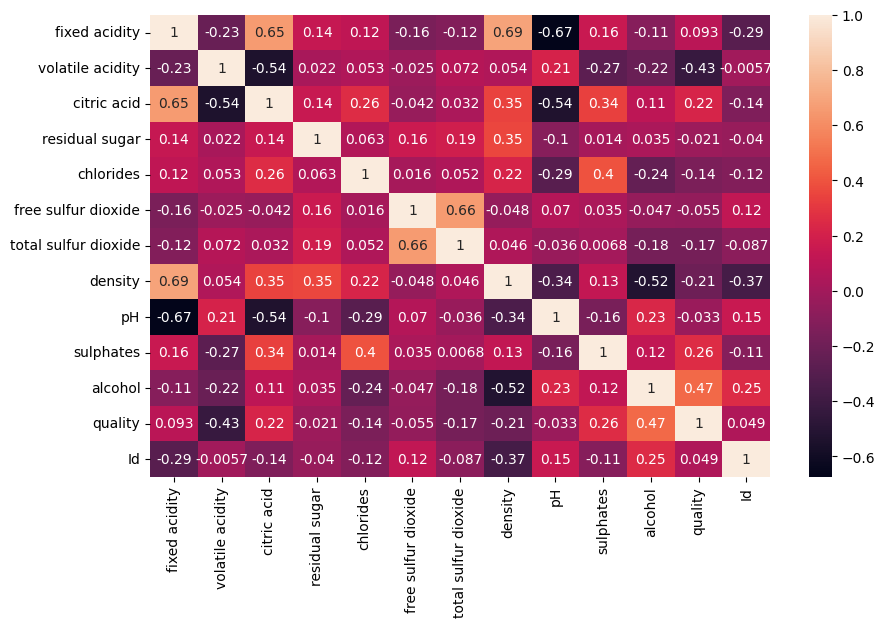

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True)
plt.savefig("docs/heatmap.png")

Heatmap yang ditampilkan adalah visualisasi **korelasi antar variabel** pada dataset anggur. Setiap sel menunjukkan **koefisien korelasi Pearson** antara dua kolom, dengan nilai dari -1 hingga 1. Warna lebih terang menunjukkan korelasi positif kuat, warna lebih gelap menunjukkan korelasi negatif kuat, dan warna netral menunjukkan korelasi lemah.

Dari heatmap ini terlihat beberapa pola penting: misalnya, `fixed acidity` berkorelasi positif dengan `citric acid` (0,65) dan negatif dengan `pH` (-0,67), `alcohol` berkorelasi positif sedang dengan `quality` (0,47), sedangkan `volatile acidity` berkorelasi negatif sedang dengan `quality` (-0,43).

**2. Pembersihan Data**

Memastikan data yang digunakan bebas dari kolom tidak relevan, nilai kosong, dan terstandarisasi untuk model.

In [26]:
# Menghapus kolom Id dari fitur agar tidak ikut dilatih
if 'Id' in X.columns:
    X = X.drop(columns=['Id'])
if 'Id' in test.columns:
    test_ids = test['Id'].values
    test = test.drop(columns=['Id'])
else:
    test_ids = template_sep[id_col].values

# Memastikan hanya kolom numerik yang digunakan
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()


Kolom Id dihapus dari fitur karena bukan variabel prediktor (hanya penanda baris).


**3. Pembuatan Model**

Membangun pipeline lengkap
(imputasi, normalisasi, dan model Random Forest) lalu melakukan pelatihan serta evaluasi.

Mengatasi nilai kosong menggunakan SimpleImputer(strategy='median') pada pipeline.


In [27]:
# Membangun pipeline
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1))
])

# Split data untuk validasi cepat
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(sss.split(X[numeric_features], y))
X_train, X_val = X.iloc[train_idx][numeric_features], X.iloc[val_idx][numeric_features]
y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# Training model
pipeline.fit(X_train, y_train)

# Evaluasi awal
y_val_pred = pipeline.predict(X_val)
print("Validation accuracy:", (y_val_pred == y_val).mean())
print(classification_report(y_val, y_val_pred, zero_division=0))

# Cross Validation cepat
cv_scores = cross_val_score(pipeline, X[numeric_features], y, cv=3, scoring="accuracy", n_jobs=1)
print("3-fold CV mean accuracy:", cv_scores.mean())



Validation accuracy: 0.6162790697674418
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.67      0.79      0.72        73
           6       0.57      0.57      0.57        68
           7       0.50      0.36      0.42        22
           8       1.00      0.33      0.50         3

    accuracy                           0.62       172
   macro avg       0.46      0.34      0.37       172
weighted avg       0.59      0.62      0.60       172

3-fold CV mean accuracy: 0.631251789146526


Pipeline digunakan agar seluruh proses (imputasi, normalisasi, klasifikasi) berjalan otomatis dan konsisten.

Model RandomForestClassifier dipilih karena stabil untuk data klasifikasi multikelas dan tidak memerlukan asumsi distribusi.

Evaluasi validasi menggunakan StratifiedShuffleSplit memastikan distribusi label seimbang di train–val split.

Cross-validation (3-fold) digunakan untuk estimasi akurasi rata-rata keseluruhan.

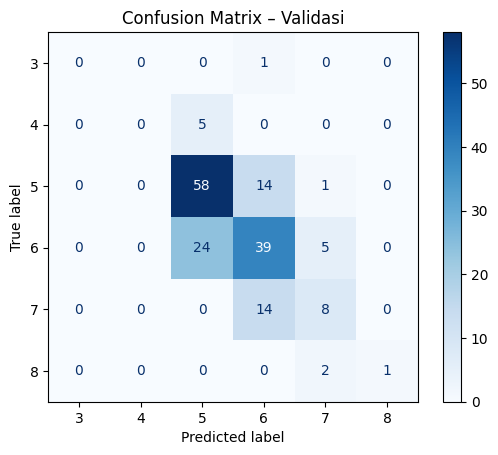

/tmp/ipython-input-2408028856.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feat_imp_df, palette="viridis")


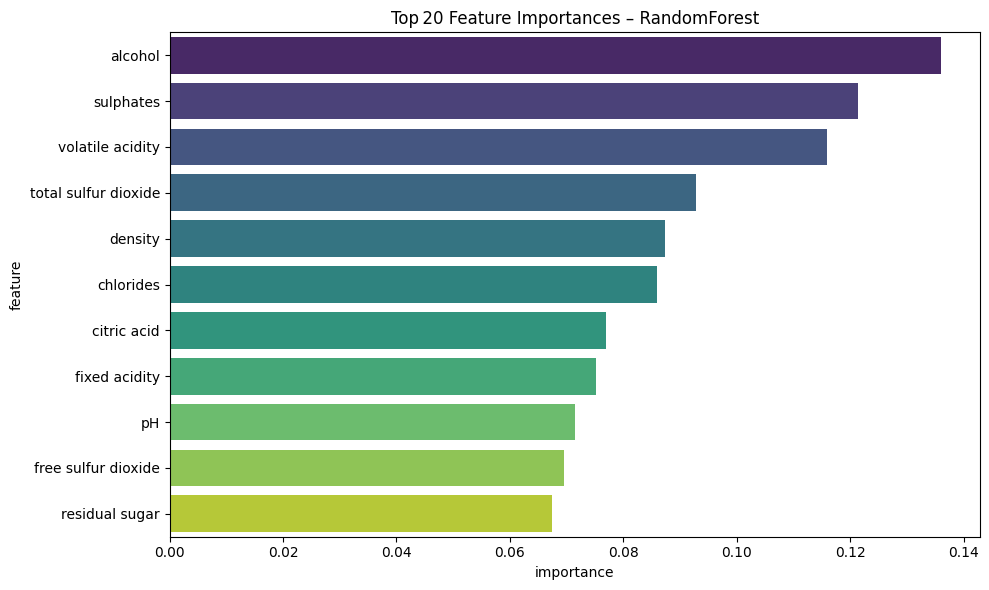

5-fold CV accuracies: [0.6395 0.657  0.6842 0.6784 0.5556]
Mean CV accuracy: 0.6429


In [28]:

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred, labels=np.sort(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.sort(y.unique()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – Validasi")
plt.show()

# Feature Importances
feat_imp = pipeline.named_steps["clf"].feature_importances_
feat_imp_df = pd.DataFrame({"feature": numeric_features, "importance": feat_imp})
feat_imp_df = feat_imp_df.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_imp_df, palette="viridis")
plt.title("Top 20 Feature Importances – RandomForest")
plt.tight_layout()
plt.show()

# Cross-validation 5-fold pada seluruh training set
cv_scores = cross_val_score(pipeline, X[numeric_features], y, cv=5, scoring="accuracy", n_jobs=-1)
print("5-fold CV accuracies:", np.round(cv_scores,4))
print("Mean CV accuracy:", np.round(cv_scores.mean(),4))

**Confusion Matrix**

Mengukur bagaimana prediksi model sesuai dengan label asli, membantu mengetahui kelas mana yang sering salah prediksi.

**Feature Importance**

Menampilkan fitur-fitur yang paling berpengaruh dalam prediksi model, sehingga bisa melihat mana faktor utama yang dipakai model.

**Cross-Validation 5-Fold**

Membagi data menjadi 5 bagian untuk melatih dan menguji secara bergilir, lalu menghitung rata-rata akurasi untuk mengecek kestabilan dan kemampuan generalisasi model.

**4. Prediksi Data Uji**

Menggunakan model yang sudah dilatih untuk memprediksi nilai quality pada dataset testing.

In [29]:

test_numeric = [c for c in numeric_features if c in test.columns]
X_test = test[test_numeric]

# Transformasi dan prediksi
X_test_trans = pipeline.named_steps['scaler'].transform(
    pipeline.named_steps['imputer'].transform(X_test)
)
y_test_pred = pipeline.named_steps['clf'].predict(X_test_trans)


Pada bagian kode ini akan dipilih angka yang tersedia dari data uji, lalu menjalankan dua tahap persiapan data, yakni mengganti nilai yang hilang dengan median, dan menstandarisasi skala setiap fitur dengan menggunakan model yang sudah dilatih.

Setelah itu model memprediksi kualitas untuk setiap baris data uji yang menghasilkan output berupa label kualitas (misalnya 5, 6, 7, dst.).

**5. Pengumpulan Hasil**

Menyusun hasil prediksi ke dalam format yang telah disediakan

In [30]:
# Membuat DataFrame hasil prediksi
output_df = pd.DataFrame({
    "Id": test_ids,
    "quality": y_test_pred
})[["Id", "quality"]]

# Menyimpan file hasil prediksi
out_path = "hasilprediksi_003.csv"
output_df.to_csv(out_path, index=False)

print("File hasil disimpan di:", out_path)


File hasil disimpan di: hasilprediksi_003.csv
